# Locate images in drive



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/My Drive/bio_research/Code')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Install dependencies

In [2]:
%%shell
pip install mahotas
pip install segutils
pip install cython

# Install pycocotools, the version by default in Colab
# has a bug fixed in https://github.com/cocodataset/cocoapi/pull/354
pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

     |████████████████████████████████| 5.7MB 6.0MB/s 
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-f3bn8929
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-f3bn8929
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266460 sha256=0702acffbf46474dc5a65b9975878dfbb28b02abd020968ba7ae1bc547388adb
  Stored in directory: /tmp/pip-ephem-wheel-cache-4u3d80io/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.1
    Uninstalling pycocotools-2.0.1:
      Successfully uninstalled pycocotools-2.0.1


In [3]:
import train_microscopy
import json

In [4]:
images_dir = 'resources/images/segmentation'
max_dets = 250

history = train_microscopy.train(os.path.join(images_dir, 'train'),
                                 'resources/models/pytorch_mask_rcnn_30_epochs_state_dict_maxdets.{}.pkl'.format(max_dets),
                                 os.path.join(images_dir, 'test'),
                                 maxdets=max_dets)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth



training


/usr/local/lib/python3.6/dist-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Epoch: [0]  [10/40]  eta: 0:02:06  lr: 0.000257  precision: 0.193372  recall: 0.463716  iou_score: 0.149707  f1-score: 0.227872  f2-score: 0.268296  loss: 1.6609 (3.3017)  loss_classifier: 0.2481 (0.2943)  loss_box_reg: 0.4589 (0.4823)  loss_mask: 0.6214 (1.2030)  loss_objectness: 0.1222 (1.1270)  loss_rpn_box_reg: 0.1552 (0.1951)  time: 4.2222  data: 0.2619  max mem: 4329
Epoch: [0]  [20/40]  eta: 0:01:10  lr: 0.000513  precision: 0.351008  recall: 0.606821  iou_score: 0.284918  f1-score: 0.402561  f2-score: 0.461744  loss: 1.4428 (2.2704)  loss_classifier: 0.2283 (0.2524)  loss_box_reg: 0.5200 (0.5134)  loss_mask: 0.3621 (0.7354)  loss_objectness: 0.1110 (0.6159)  loss_rpn_box_reg: 0.1196 (0.1533)  time: 3.5460  data: 0.1353  max mem: 4329


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: [0]  [30/40]  eta: 0:00:34  lr: 0.000769  precision: 0.273290  recall: 0.637444  iou_score: 0.227033  f1-score: 0.324634  f2-score: 0.387059  loss: 1.4428 (3.1409)  loss_classifier: 0.2283 (0.6342)  loss_box_reg: 0.5714 (0.5984)  loss_mask: 0.2836 (1.1569)  loss_objectness: 0.1110 (0.5584)  loss_rpn_box_reg: 0.1757 (0.1930)  time: 3.0597  data: 0.0082  max mem: 4329
Epoch: [0]  [40/40]  eta: 0:00:00  lr: 0.001000  precision: 0.265880  recall: 0.665677  iou_score: 0.224959  f1-score: 0.325987  f2-score: 0.399276  loss: 1.8613 (2.8104)  loss_classifier: 0.2878 (0.5498)  loss_box_reg: 0.5537 (0.5919)  loss_mask: 0.5267 (0.9940)  loss_objectness: 0.1903 (0.4793)  loss_rpn_box_reg: 0.2070 (0.1954)  time: 2.9875  data: 0.0074  max mem: 4329
Epoch: [0] Total time: 0:02:10 (3.2696 s / it)
testing
Epoch: [0]  [5/5]  eta: 0:00:00  lr: 0.001000  precision: 0.265880  recall: 0.665677  iou_score: 0.224959  f1-score: 0.325987  f2-score: 0.399276  loss: 1.8613 (2.8104)  loss_classifier: 0.2878

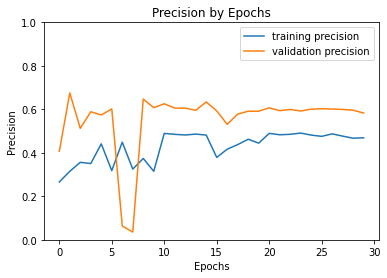

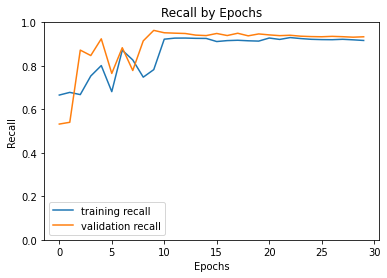

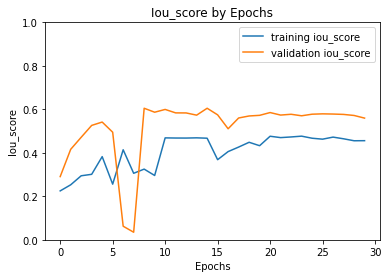

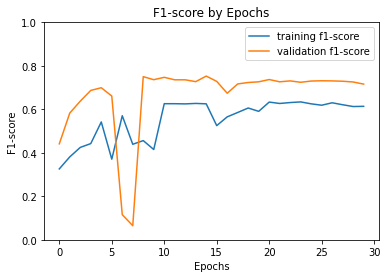

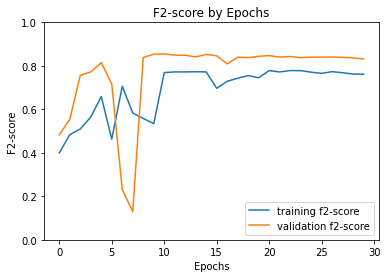

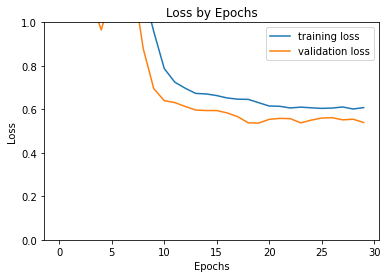

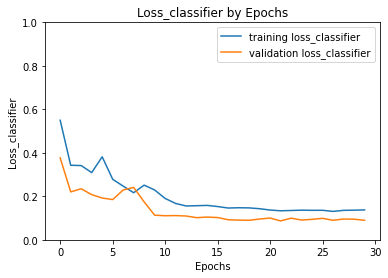

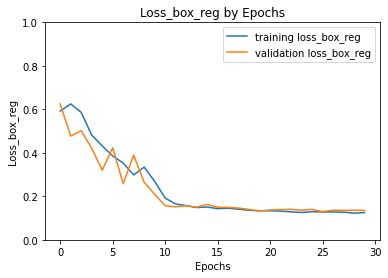

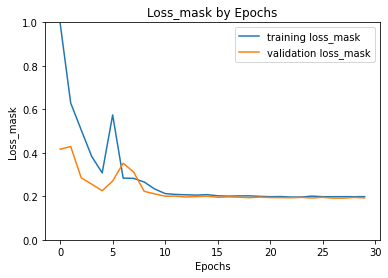

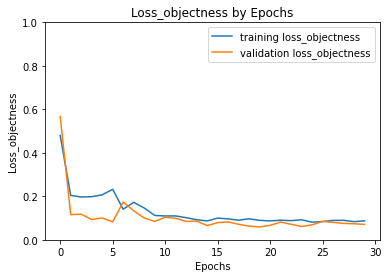

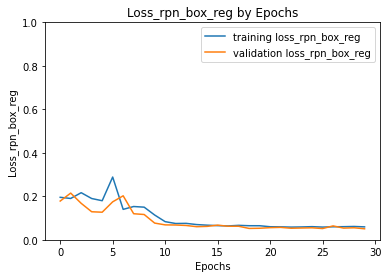

In [6]:
from segutils import graphutils

save_dir = '../Docs/pytorch_train_res_maxdets={}'.format(max_dets)
os.makedirs(save_dir, exist_ok=True)

# save history as text
with open(os.path.join(save_dir, f'history.json'), 'w') as f:
    json.dump(eval(str(history.history)), f, indent=4)

# plot all metrics
save_path_template = os.path.join(save_dir, '{} plot.png')

for k, v in history.history.items():
    if k.startswith('val_') or k=='lr':
      continue

    graphutils.plot_keras_history(history, metric=k, save_path=save_path_template.format(k), ylim=(0, 1))


# seg.vis.plot_history(history, 'loss', save_path_template.format(LOSS.name + ' loss'), scaled=True)
# seg.vis.plot_history(history, 'accuracy', save_path_template.format('accuracy'), scaled=True)
# seg.vis.plot_history(history, seg.metrics.iou_score.name, save_path_template.format(seg.metrics.iou_score.name), scaled=True)
# seg.vis.plot_history(history, seg.metrics.precision.name, save_path_template.format(seg.metrics.precision.name), scaled=True)
# seg.vis.plot_history(history, seg.metrics.recall.name, save_path_template.format(seg.metrics.recall.name), scaled=True)
# seg.vis.plot_history(history, seg.metrics.f1_score.name, save_path_template.format(seg.metrics.f1_score.name), scaled=True)
# seg.vis.plot_history(history, seg.metrics.f2_score.name, save_path_template.format(seg.metrics.f2_score.name), scaled=True)